In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df=pd.read_csv('/content/Tweets.csv')
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [ ]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
df.shape


(27481, 4)

In [ ]:
df.columns


Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

In [ ]:
# COnvert text lowercase
df['text']=df['text'].str.lower()
# Convert text column to string data type
df['text']=df['text'].astype(str)
# Tokenization
df['tokens']=df['text'].apply(nltk.word_tokenize)

In [ ]:
# Removing Stopwords
stopwords=nltk.corpus.stopwords.words('english')
df['tokens']=df['tokens'].apply(lambda x: [word for word in x if word not in stopwords])

In [ ]:
X=df['text']
y=df['sentiment']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
vectorizer=TfidfVectorizer()
x_train_vectors=vectorizer.fit_transform(x_train).toarray()
x_test_vectors=vectorizer.transform(x_test).toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb=GaussianNB()
gnb.fit(x_train_vectors,y_train)

GaussianNB()

In [ ]:
gnb.predict(x_test_vectors)



array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype='<U8')

In [ ]:
y_pred=gnb.predict(x_test_vectors)
print('Classification Report: ')
print(classification_report(y_test,y_pred))
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

    negative       0.34      0.70      0.46      2338
     neutral       0.45      0.16      0.24      3371
    positive       0.47      0.42      0.44      2536

    accuracy                           0.39      8245
   macro avg       0.42      0.43      0.38      8245
weighted avg       0.42      0.39      0.36      8245

Accuracy Score:  0.3917525773195876


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

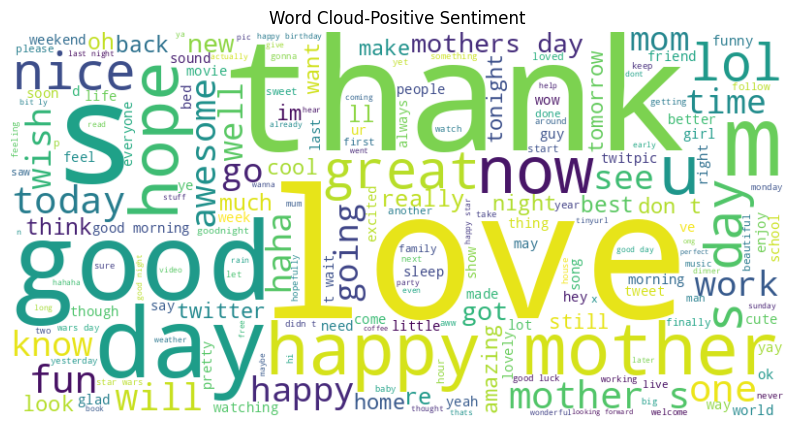

In [ ]:
positive_tweets=df[df['sentiment']=='positive']['text']
positive_tweets=' '.join(positive_tweets)
wordcloud=WordCloud(width=800,height=400, background_color='white').generate(positive_tweets)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud-Positive Sentiment')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

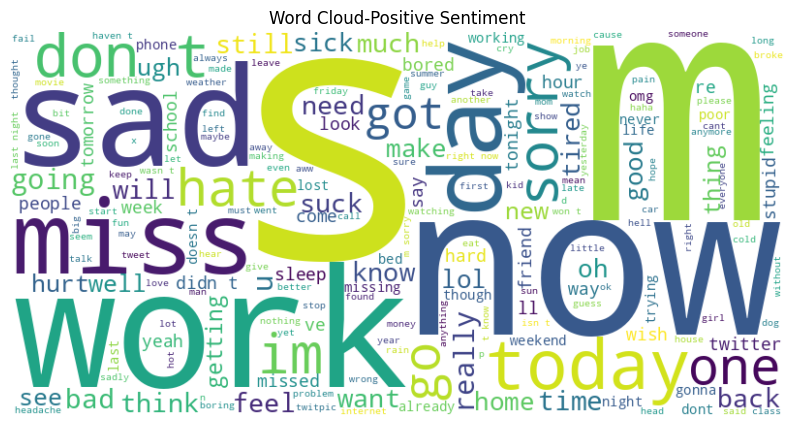

In [ ]:
negative_tweets=df[df['sentiment']=='negative']['text']
negative_tweets=' '.join(negative_tweets)
wordcloud=WordCloud(width=800,height=400, background_color='white').generate(negative_tweets)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud-Positive Sentiment')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

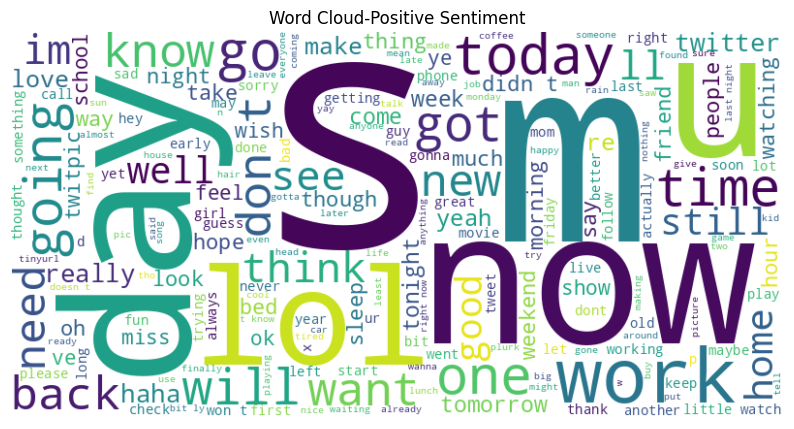

In [ ]:
neutral_tweets=df[df['sentiment']=='neutral']['text']
neutral_tweets=' '.join(neutral_tweets)
wordcloud=WordCloud(width=800,height=400, background_color='white').generate(neutral_tweets)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud-Positive Sentiment')
plt.show